Gayatri Godbole <br>
TE1 <br>
31128 <br>

## Dataset: StudentsPerformance_modified.csv


In [109]:
import pandas as pd
import numpy as np
import seaborn as sns

In [110]:
df=pd.read_csv("StudentsPerformance_modified.csv")

In [111]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [112]:
df.shape

(1000, 8)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [114]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [115]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [116]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

## 1. Missing values

In [117]:
df.isnull().sum() #prints the number of missing values in every column

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [118]:
df.fillna(df.mean(), inplace=True) #for numeric values

In [119]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  0
writing score                  0
dtype: int64

In [120]:
math = df['math score']
math

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: object

In [121]:
df["math score"] = pd.to_numeric(df["math score"], errors='coerce').fillna(0).astype(np.int64) #convert from string to int

In [122]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                  float64
writing score                  float64
dtype: object

In [123]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [124]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## 2. Categorical variables to numeric 
To convert non-linear relation to linear

In [125]:
#check categorical values
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [126]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [127]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [128]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [129]:
df[ 'test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [130]:
g_hot = pd.get_dummies(df['gender']).add_prefix('gender'+' - ')
df = df.drop('gender',axis = 1)
df = df.join(g_hot)
df  

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender - female,gender - male
0,group B,bachelor's degree,standard,none,72,72.0,74.0,1,0
1,group C,some college,standard,completed,69,90.0,88.0,1,0
2,group B,master's degree,standard,none,90,95.0,93.0,1,0
3,group A,associate's degree,free/reduced,none,47,57.0,44.0,0,1
4,group C,some college,standard,none,76,78.0,75.0,0,1
...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88,99.0,95.0,1,0
996,group C,high school,free/reduced,none,62,55.0,55.0,0,1
997,group C,high school,free/reduced,completed,59,71.0,65.0,1,0
998,group D,some college,standard,completed,68,78.0,77.0,1,0


In [131]:
tpc_hot = pd.get_dummies(df['test preparation course']).add_prefix('course status'+' - ')
df = df.drop('test preparation course',axis = 1)
df = df.join(tpc_hot)
df  

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,gender - female,gender - male,course status - completed,course status - none
0,group B,bachelor's degree,standard,72,72.0,74.0,1,0,0,1
1,group C,some college,standard,69,90.0,88.0,1,0,1,0
2,group B,master's degree,standard,90,95.0,93.0,1,0,0,1
3,group A,associate's degree,free/reduced,47,57.0,44.0,0,1,0,1
4,group C,some college,standard,76,78.0,75.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,88,99.0,95.0,1,0,1,0
996,group C,high school,free/reduced,62,55.0,55.0,0,1,0,1
997,group C,high school,free/reduced,59,71.0,65.0,1,0,1,0
998,group D,some college,standard,68,78.0,77.0,1,0,1,0


In [132]:
ped_hot = pd.get_dummies(df['parental level of education']).add_prefix('parent edu'+' - ')
df = df.drop('parental level of education',axis = 1)
df = df.join(ped_hot)
df  

,race/ethnicity,lunch,math score,reading score,writing score,gender - female,gender - male,course status - completed,course status - none,parent edu - associate's degree,parent edu - bachelor's degree,parent edu - high school,parent edu - master's degree,parent edu - some college,parent edu - some high school
0,group B,standard,72,72.0,74.0,1,0,0,1,0,1,0,0,0,0
1,group C,standard,69,90.0,88.0,1,0,1,0,0,0,0,0,1,0
2,group B,standard,90,95.0,93.0,1,0,0,1,0,0,0,1,0,0
3,group A,free/reduced,47,57.0,44.0,0,1,0,1,1,0,0,0,0,0
4,group C,standard,76,78.0,75.0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,group E,standard,88,99.0,95.0,1,0,1,0,0,0,0,1,0,0
996,group C,free/reduced,62,55.0,55.0,0,1,0,1,0,0,1,0,0,0
997,group C,free/reduced,59,71.0,65.0,1,0,1,0,0,0,1,0,0,0
998,group D,standard,68,78.0,77.0,1,0,1,0,0,0,0,0,1,0


## 3. Outliers - Detection and Handling
https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/ <br>
https://www.thoughtco.com/what-is-the-interquartile-range-3126245

Detection

C:\Users\Gayatri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reading score'>

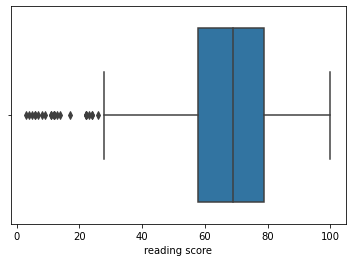

In [133]:
sns.boxplot(df['reading score'])

C:\Users\Gayatri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='writing score'>

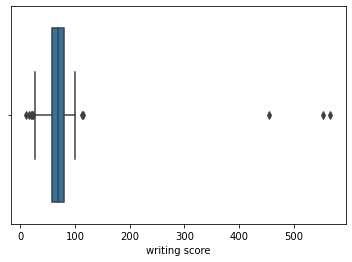

In [134]:
sns.boxplot(df['writing score'])

C:\Users\Gayatri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score'>

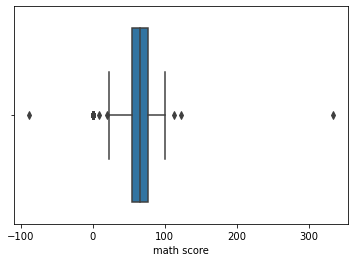

In [135]:
sns.boxplot(df['math score'])

We see from the above figures that in this data, outliers are present.
So we need to remove them.

Removing

## IQR: Interquartile Range
Data divided into 4 parts by 3 quartiles- Q1, Q2, Q3 
Q1: middle number between the smallest number and the median of the data set
Q2: is the median of the data
Q3: middle value between the median and the highest value of the data set

IQR=Q3-Q1
The interquartile range IQR tells us the range 
where the bulk of the values lie.

More the IQR value, more the variablity.

Range and standard deviation tell how spread out our data is.The problem with these descriptive statistics is that they are quite sensitive to outliers.

IQR is not sensitive to outliers.Tells how spread out the middle 50% of our set of data is. So this value is not affected by extreme values in the dataset.

Q1 is the value where range 25% lies
Q3 is where 75% 
We assume that max data is in 25-75 % - so we find the range of the data that in Q3 and Q1 and called it as IQR
Now all data can't be present in IQR so we need to set a threshold to to say that even if data doesn't lie in IQR, still it is valid and not an outlier.
So, on either side of Q1 and Q3 we can leave a buffer of 1.5*IQR
If a data point is further from this buffer then it is an outlier.




In [136]:
def outlierDetection (i,df):
    Q1 = np.percentile(df[i], 25)
 
    Q3 = np.percentile(df[i], 75)
    IQR = Q3 - Q1
    # Upper bound
    upper = np.where(df[i] >= (Q3+1.5*IQR)) #stores rows that are above this 1.5 buffer (they are outliers)
    # Lower bound
    lower = np.where(df[i] <= (Q1-1.5*IQR)) #stores rows that are above this 1.5 buffer (they are outliers)

    ''' Removing the Outliers '''
    df.drop(upper[0],axis=0, inplace = True) #drop the rows that are stored. we need to provide index to drop and in upper,lower variables, 
                                            #whole row gets stored, so we say upper[0] to get index and delete by it 
    df.drop(lower[0],axis=0, inplace = True)

In [137]:
outlierDetection('reading score',df)
df = df.reset_index(drop=True) #after dropping some values,to make the indices as continuous again, we reset the index

In [138]:
outlierDetection('writing score',df)
df = df.reset_index(drop=True)

In [139]:
outlierDetection('math score',df)
df = df.reset_index(drop=True)

## Rechecking outliers by plotting box graph

C:\Users\Gayatri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reading score'>

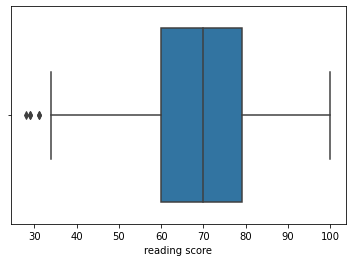

In [140]:
sns.boxplot(df['reading score'])

C:\Users\Gayatri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='writing score'>

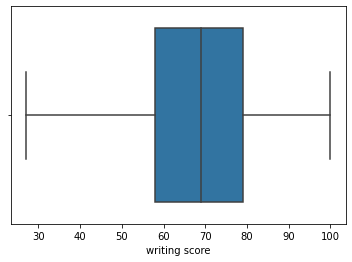

In [141]:
sns.boxplot(df['writing score'])

C:\Users\Gayatri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score'>

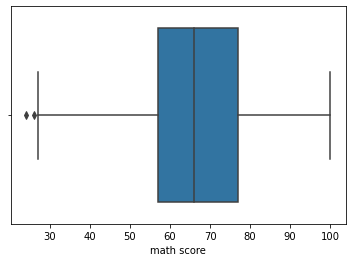

In [142]:
sns.boxplot(df['math score'])

Thus we have reduced the number of outliers.

## Quantile Plot 
To check if sample data is normally distributed or not
If points in a straight line (diagonal) it is normal distribution.

In [143]:
from seaborn_qqplot import pplot

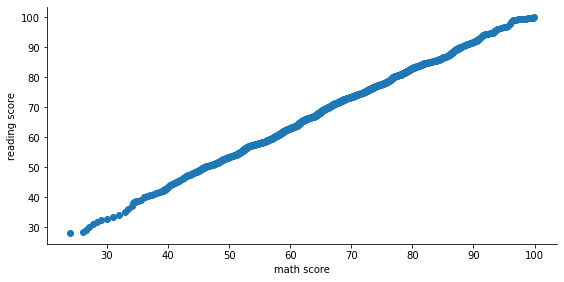

In [144]:
pplot(df, x="math score", y="reading score", kind='qq', height=4, aspect=2)

## Normalization

Used to scale the data of an attribute so that it falls in a smaller range, such as -1.0 to 1.0 or 0.0 to 1.0
When multiple attributes are there but attributes have values on different scales, this may lead to poor data models while performing data mining operations.So they are normalized to bring all the attributes on the same scale.<br>
Techniques:<br>
1)maximum absolute scaling <br>
2)min-max scaling <br>
3)z-score scaling <br>
Here, maximum absolute scaling applied. The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value.
https://www.geeksforgeeks.org/data-normalization-with-pandas/

In [146]:
# copy the data
df_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    if(df_max_scaled.dtypes[column]=='O'):
        df_max_scaled[column] = df_max_scaled[column] #string type
    else:
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
df_max_scaled

,race/ethnicity,lunch,math score,reading score,writing score,gender - female,gender - male,course status - completed,course status - none,parent edu - associate's degree,parent edu - bachelor's degree,parent edu - high school,parent edu - master's degree,parent edu - some college,parent edu - some high school
0,group B,standard,0.72,0.72,0.74,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,group C,standard,0.69,0.90,0.88,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,group B,standard,0.90,0.95,0.93,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,group A,free/reduced,0.47,0.57,0.44,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,group C,standard,0.76,0.78,0.75,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,group E,standard,0.88,0.99,0.95,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
924,group C,free/reduced,0.62,0.55,0.55,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
925,group C,free/reduced,0.59,0.71,0.65,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
926,group D,standard,0.68,0.78,0.77,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


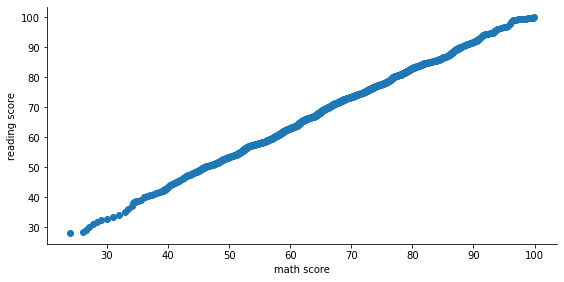

In [147]:
pplot(df, x="math score", y="reading score", kind='qq', height=4, aspect=2)

In [149]:
df.std()

math score                         14.626210
reading score                      14.203345
writing score                      14.656968
gender - female                     0.499934
gender - male                       0.499934
course status - completed           0.481166
course status - none                0.481166
parent edu - associate's degree     0.417238
parent edu - bachelor's degree      0.325942
parent edu - high school            0.393937
parent edu - master's degree        0.238253
parent edu - some college           0.417949
parent edu - some high school       0.382552
dtype: float64

In [150]:
df_max_scaled.std()

math score                         0.146262
reading score                      0.142033
writing score                      0.146570
gender - female                    0.499934
gender - male                      0.499934
course status - completed          0.481166
course status - none               0.481166
parent edu - associate's degree    0.417238
parent edu - bachelor's degree     0.325942
parent edu - high school           0.393937
parent edu - master's degree       0.238253
parent edu - some college          0.417949
parent edu - some high school      0.382552
dtype: float64

In [151]:
df.mean()

math score                         66.447198
reading score                      69.438630
writing score                      68.472426
gender - female                     0.518319
gender - male                       0.481681
course status - completed           0.363147
course status - none                0.636853
parent edu - associate's degree     0.224138
parent edu - bachelor's degree      0.120690
parent edu - high school            0.191810
parent edu - master's degree        0.060345
parent edu - some college           0.225216
parent edu - some high school       0.177802
dtype: float64

In [152]:
df_max_scaled.mean()

math score                         0.664472
reading score                      0.694386
writing score                      0.684724
gender - female                    0.518319
gender - male                      0.481681
course status - completed          0.363147
course status - none               0.636853
parent edu - associate's degree    0.224138
parent edu - bachelor's degree     0.120690
parent edu - high school           0.191810
parent edu - master's degree       0.060345
parent edu - some college          0.225216
parent edu - some high school      0.177802
dtype: float64

In [153]:
df_max_scaled.median()

math score                         0.66
reading score                      0.70
writing score                      0.69
gender - female                    1.00
gender - male                      0.00
course status - completed          0.00
course status - none               1.00
parent edu - associate's degree    0.00
parent edu - bachelor's degree     0.00
parent edu - high school           0.00
parent edu - master's degree       0.00
parent edu - some college          0.00
parent edu - some high school      0.00
dtype: float64

Hence, after normalization, the mean=median=mode, and the standard deviation also reduces.